# STARCOP dataset exploration demo

In this notebook we will show how to explore the datasets created for the STARCOP project.

Small subsets of this data are available at this
[public Google Drive folder](https://drive.google.com/drive/folders/16FSBkb7cVqYc3f6t3vLQY1s0o0aLLq57). We have uploaded here: the entire test set, subset of the training dataset with large events (called "easy_train") and a mini version of the dataset with only the top 10 largest plumes in train and test (this is just to be used with fast Colab demos).

For the full training dataset please see the details on the Zenodo page - https://doi.org/10.5281/zenodo.7863343.

Here we will show some of the examples of methane events in the dataset.

In [ ]:
!pip install --quiet rasterio
!pip install --quiet --upgrade gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 40.3 MB/s eta 0:00:00


## Get the data

*Note: the two larger files will take approximately 2-3 minutes to download (as we are downloading almost 14GB to the VM) - so for the demo we will instead use a mini subset (uncomment the other download scripts if you want to download the larger versions)*

In [ ]:
# You can download these with gdown:

# STARCOP_mini.zip with 261 MB
#!gdown https://drive.google.com/uc?id=1Qw96Drmk2jzBYSED0YPEUyuc2DnBechl -O STARCOP_mini.zip
# STARCOP_test.zip with 5.25 GB
!gdown https://drive.google.com/uc?id=1TwtSVpbvGd-lWfIjQrw0i4LqkiX2EuHq -O STARCOP_test.zip
# STARCOP_train_easy.zip with 8.38 GB
!gdown https://drive.google.com/uc?id=1C4ZHvT1ZPKVMFGmqcV12Aozs8Uv_DIxD -O STARCOP_easy_train.zip

public_folder = "." # because we downloaded these locally

Downloading...
From (original): https://drive.google.com/uc?id=1TwtSVpbvGd-lWfIjQrw0i4LqkiX2EuHq
From (redirected): https://drive.google.com/uc?id=1TwtSVpbvGd-lWfIjQrw0i4LqkiX2EuHq&confirm=t&uuid=198fc217-622a-4cd1-a3ae-429a660bd909
To: /content/STARCOP_test.zip
100% 5.63G/5.63G [02:59<00:00, 31.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1C4ZHvT1ZPKVMFGmqcV12Aozs8Uv_DIxD
From (redirected): https://drive.google.com/uc?id=1C4ZHvT1ZPKVMFGmqcV12Aozs8Uv_DIxD&confirm=t&uuid=33b57666-6774-4973-b8f0-ca5e9b29920f
To: /content/STARCOP_easy_train.zip
100% 9.00G/9.00G [03:41<00:00, 40.6MB/s]


In [ ]:
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part1.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part2.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part3.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part4.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_train_remaining_part5.zip?download=1
# !gdown https://zenodo.org/records/7863343/files/train.csv?download=1
# !gdown https://zenodo.org/records/7863343/files/test.csv?download=1
# !gdown https://zenodo.org/records/7863343/files/STARCOP_test.zip?download=1

In [ ]:
# !cp /content/STARCOP_train_remaining_part1.zip?download=1 "/content/drive/My Drive/dataset/train_1.zip"
# !cp /content/STARCOP_train_remaining_part2.zip?download=1 "/content/drive/My Drive/dataset/train_2.zip"
# !cp /content/STARCOP_train_remaining_part3.zip?download=1 "/content/drive/My Drive/dataset/train_3.zip"
# !cp /content/STARCOP_train_remaining_part4.zip?download=1 "/content/drive/My Drive/dataset/train_4.zip"
# !cp /content/STARCOP_train_remaining_part5.zip?download=1 "/content/drive/My Drive/dataset/train_5.zip"
# !cp  /content/STARCOP_test.zip?download=105g7btw5tmp "/content/drive/My Drive/dataset/test.zip"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip the data

In [ ]:
import os
from glob import glob
public_folder = "."
files_to_extract = sorted(glob(os.path.join(public_folder,"*.zip")))
print("All:",files_to_extract)

All: ['./STARCOP_easy_train.zip', './STARCOP_test.zip']


In [ ]:
import zipfile
from tqdm import tqdm

dataset_folder = "./datasets"
os.makedirs(dataset_folder, exist_ok=True)

for zip_files in tqdm(files_to_extract):
  with zipfile.ZipFile(zip_files, "r") as zip_ref:
    zip_ref.extractall(dataset_folder)
    zip_ref.close()

100%|██████████| 2/2 [02:30<00:00, 75.20s/it]


In [ ]:
# we can delete these now:
!rm *.zip

In [ ]:
# Now we have files ready:
folders_in_test = sorted(glob(os.path.join(dataset_folder,"STARCOP_test/*")))
folders_in_test = [f for f in folders_in_test if ".csv" not in f]

print("We have", len(folders_in_test), "folders in the test set.")

folders_in_train_easy = sorted(glob(os.path.join(dataset_folder,"STARCOP_train_easy/*")))
folders_in_train_easy = [f for f in folders_in_train_easy if ".csv" not in f]
print("And we have", len(folders_in_train_easy), "folders in the train_easy subset.")

folders_in_mini = sorted(glob(os.path.join(dataset_folder,"STARCOP_mini/*")))
folders_in_mini = [f for f in folders_in_mini if ".csv" not in f]
print("And we have", len(folders_in_mini), "folders in the mini subset.")

print("\n--\n")

print("Each folder has these files:")
!ls {folders_in_mini[0]}

We have 342 folders in the test set.
And we have 559 folders in the train_easy subset.
And we have 0 folders in the mini subset.

--

Each folder has these files:
ls: cannot access '{folders_in_mini[0]}': No such file or directory


In [ ]:
print("These are the available csv files:")
!ls datasets/*/*.csv

These are the available csv files:
datasets/STARCOP_test/test.csv	datasets/STARCOP_train_easy/train_easy.csv


In [ ]:
# Choose which one to visualise:
visualise_folder = "/content/datasets/STARCOP_train_easy" # "datasets/STARCOP_test" # "datasets/STARCOP_train_easy"

csv_file = "datasets/STARCOP_train_easy/train_easy.csv"
#csv_file = "datasets/STARCOP_mini/train_mini10.csv"

## Visualise the data

In [ ]:
import rasterio.plot as rstplt
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from mpl_toolkits.axes_grid1 import make_axes_locatable

def hide_all_ticks(ax, hide_border=False):
    # hide all ticks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])

    #hide border
    if hide_border: ax.axis('off')

def colorbar_next_to(im, ax, size='5%',pad=0.05):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size=size, pad=pad)
    plt.gcf().colorbar(im, cax=cax, orientation='vertical')

def maintain_same_sizes(im, ax, size='5%',pad=0.05):
    # creates and deletes a fake colorbar - to maintain the same plot sizes
    colorbar_next_to(im, ax, size=size, pad=pad)
    fig.delaxes(fig.axes[-1])

In [ ]:
import pandas as pd
df = pd.read_csv(csv_file)
df = df.sort_values(by=['qplume'], ascending=False)

In [ ]:
df_test=pd.read_csv("datasets/STARCOP_test/test.csv")
df_test = df_test.sort_values(by=['qplume'], ascending=False)

In [ ]:
# In our work we use this dataframe to hold information about samples in the dataset, see the rows and items in this:
df

,id,candidate_id,qplume,name,folder,date,datetime,window_col_off,window_row_off,window_width,window_height,subset,difficulty,label_path,has_plume,window_labels
286,ang20191011t165345_r4367_c196_w151_h151,ang20191011t165345-1,11239.539700,ang20191011t165345,/AVIRISNG/Permian2019/ang20191011t165345_r4367...,2019-10-11,2019-10-11 16:53:45+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
287,ang20190924t183641_r14137_c154_w151_h151,ang20190924t183641-4,11164.897300,ang20190924t183641,/AVIRISNG/Permian2019/ang20190924t183641_r1413...,2019-09-24,2019-09-24 18:36:41+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
288,ang20191008t151045_r5097_c477_w151_h151,ang20191008t151045-12,6924.176730,ang20191008t151045,/AVIRISNG/Permian2019/ang20191008t151045_r5097...,2019-10-08,2019-10-08 15:10:45+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
289,ang20191010t155034_r16931_c325_w151_h151,ang20191010t155034-A,6166.409548,ang20191010t155034,/AVIRISNG/Permian2019/ang20191010t155034_r1693...,2019-10-10,2019-10-10 15:50:34+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
290,ang20191005t210402_r9366_c472_w151_h151,ang20191005t210402-10,5784.074120,ang20191005t210402,/AVIRISNG/Permian2019/ang20191005t210402_r9366...,2019-10-05,2019-10-05 21:04:02+00:00,0,0,512,512,train,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,ang20191016t181351_r6656_c0_w512_h512,NaN,0.000000,ang20191016t181351,/AVIRISNG/Permian2019/ang20191016t181351_r6656...,2019-10-16,2019-10-16 18:13:51+00:00,0,0,512,512,train,hard,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
179,ang20191016t174016_r6400_c0_w512_h512,NaN,0.000000,ang20191016t174016,/AVIRISNG/Permian2019/ang20191016t174016_r6400...,2019-10-16,2019-10-16 17:40:16+00:00,0,0,512,512,train,random,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
178,ang20191016t174016_r2560_c0_w512_h512,NaN,0.000000,ang20191016t174016,/AVIRISNG/Permian2019/ang20191016t174016_r2560...,2019-10-16,2019-10-16 17:40:16+00:00,0,0,512,512,train,hard,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
177,ang20191016t172526_r2048_c0_w512_h512,NaN,0.000000,ang20191016t172526,/AVIRISNG/Permian2019/ang20191016t172526_r2048...,2019-10-16,2019-10-16 17:25:26+00:00,0,0,512,512,train,random,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."


Statistical Summaries for qplume:
count      559.000000
mean       908.654166
std       1271.619319
min          0.000000
25%          0.000000
50%          0.000000
75%       1471.064003
max      11239.539700
Name: qplume, dtype: float64

Correlation between spectral features and the presence of methane plumes:
Series([], Name: has_plume, dtype: float64)


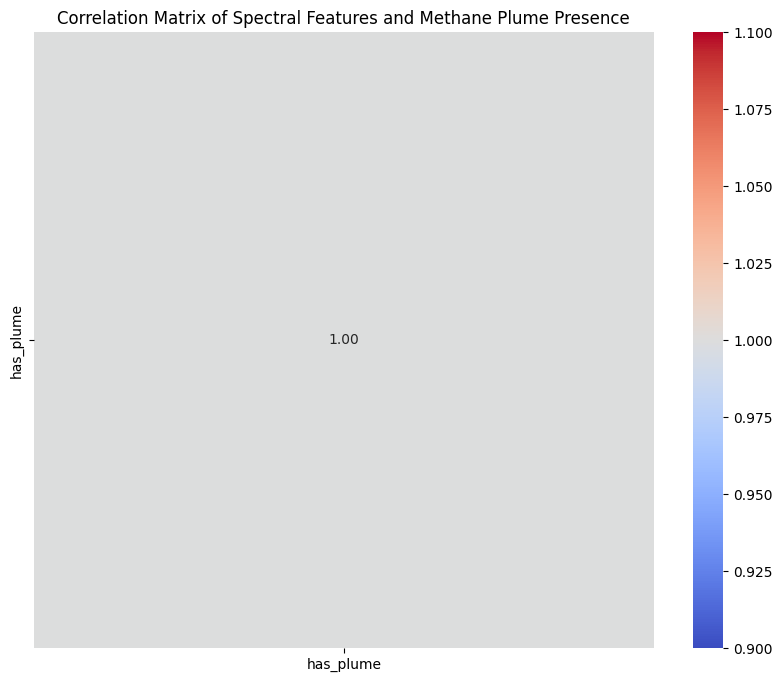

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and already loaded

# Calculate statistical summaries for qplume values
qplume_stats = df['qplume'].describe()
print("Statistical Summaries for qplume:")
print(qplume_stats)

# Calculate correlation matrix to see the relation between 'has_plume' and spectral features
# Assuming spectral feature columns are named like 'feature_1', 'feature_2', ..., 'feature_n'
# You might need to adjust these names to match your actual DataFrame
feature_columns = [col for col in df.columns if 'feature' in col]
correlation_matrix = df[feature_columns + ['has_plume']].corr()

# Focus on the correlation values between features and 'has_plume'
correlation_with_plume = correlation_matrix['has_plume'].drop('has_plume')
print("\nCorrelation between spectral features and the presence of methane plumes:")
print(correlation_with_plume)

# Optionally, you might want to visualize these correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Spectral Features and Methane Plume Presence')
plt.show()


In [ ]:
import os

# Specify the directory you want to list
directory_path = '/content/datasets/STARCOP_train_easy/ang20190922t192642_r10240_c0_w512_h512'

# List all files and directories in this directory
contents = os.listdir(directory_path)

# Optionally, print each item
for item in contents:
    print(item)


TOA_AVIRIS_460nm.tif
TOA_WV3_SWIR8.tif
TOA_WV3_SWIR4.tif
TOA_WV3_SWIR3.tif
labelbinary.tif
TOA_AVIRIS_640nm.tif
TOA_WV3_SWIR2.tif
TOA_WV3_SWIR7.tif
TOA_AVIRIS_2360nm.tif
mag1c.tif
TOA_WV3_SWIR1.tif
TOA_AVIRIS_2109nm.tif
TOA_AVIRIS_550nm.tif
TOA_WV3_SWIR5.tif
TOA_AVIRIS_2004nm.tif
weight_mag1c.tif
TOA_WV3_SWIR6.tif
TOA_AVIRIS_2310nm.tif
TOA_AVIRIS_2350nm.tif
label_rgba.tif


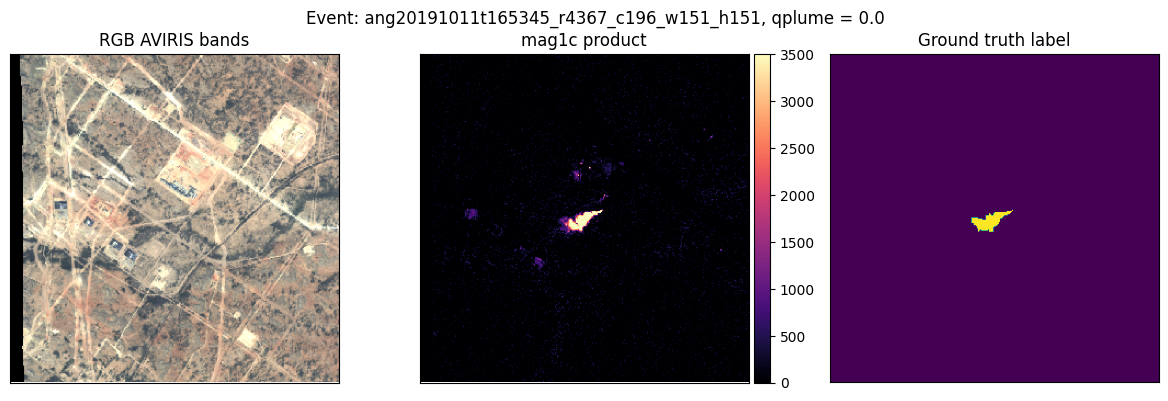

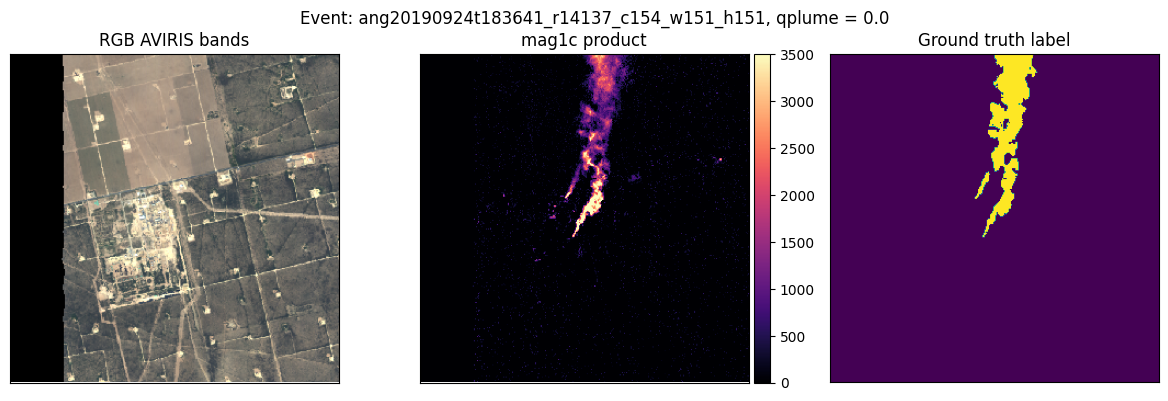

In [ ]:
size_read = 300
show_first = 2
fig_size_multiplier = 4

for idx, event_id in enumerate(list(df["id"])):
  ft = os.path.join(visualise_folder, event_id)
  # Typical input for our hyperspectral model: RGB + mag1c
  aviris_r = os.path.join(ft, "TOA_AVIRIS_640nm.tif")
  aviris_g = os.path.join(ft, "TOA_AVIRIS_550nm.tif")
  aviris_b = os.path.join(ft, "TOA_AVIRIS_460nm.tif")
  magic_path = os.path.join(ft, "mag1c.tif")
  # Ground truth:
  gt_path = os.path.join(ft, "labelbinary.tif")
  n_plots = 3

  with rasterio.open(gt_path) as src:
    width = src.width
    height = src.height

    # Compute shape to read to from pyramids and speed up plotting
    shape = src.shape
    if (size_read >= shape[0]) and (size_read >= shape[1]):
      out_shape = shape
    elif shape[0] > shape[1]:
      out_shape = (size_read, int(round(shape[1]/shape[0] * size_read)))
    else:
      out_shape = (int(round(shape[0] / shape[1] * size_read)), size_read)
    gt = src.read(1, out_shape=out_shape)

  with rasterio.open(magic_path) as src:
    magic = src.read(1, out_shape=out_shape)
  with rasterio.open(aviris_r) as src:
    r = src.read(1, out_shape=out_shape)
  with rasterio.open(aviris_g) as src:
    g = src.read(1, out_shape=out_shape)
  with rasterio.open(aviris_b) as src:
    b = src.read(1, out_shape=out_shape)

  rgb = np.asarray([r,g,b])

  fig, axes = plt.subplots(1, n_plots, figsize=(n_plots*fig_size_multiplier*width/height,fig_size_multiplier), tight_layout=True)

  # Plot GT
  ax = axes[-1]
  im=ax.imshow(gt)
  ax.set_title(f"Ground truth label")
  hide_all_ticks(ax)
  maintain_same_sizes(im,ax)

  # Plot RGB
  ax = axes[0]
  rgb = np.clip(rgb/60., 0, 2)
  im = ax.imshow(np.transpose(np.asanyarray(rgb),(1,2,0)))
  ax.set_title(f"RGB AVIRIS bands")
  hide_all_ticks(ax)
  maintain_same_sizes(im,ax)

  # mag1c
  ax = axes[1]
  im=ax.imshow(1750 * np.clip(magic / 1750.0, 0,2))
  im.set_cmap('magma')
  ax.set_title(f"mag1c product")
  hide_all_ticks(ax)
  colorbar_next_to(im, ax)

  name = ft.split("/")[-1]
  qplume = df["qplume"][idx]

  plt.suptitle(f"Event: {name}, qplume = {qplume}")
  plt.show()
  # note: below left with the first two outputs as a demo

  show_first -= 1
  if show_first <= 0: break

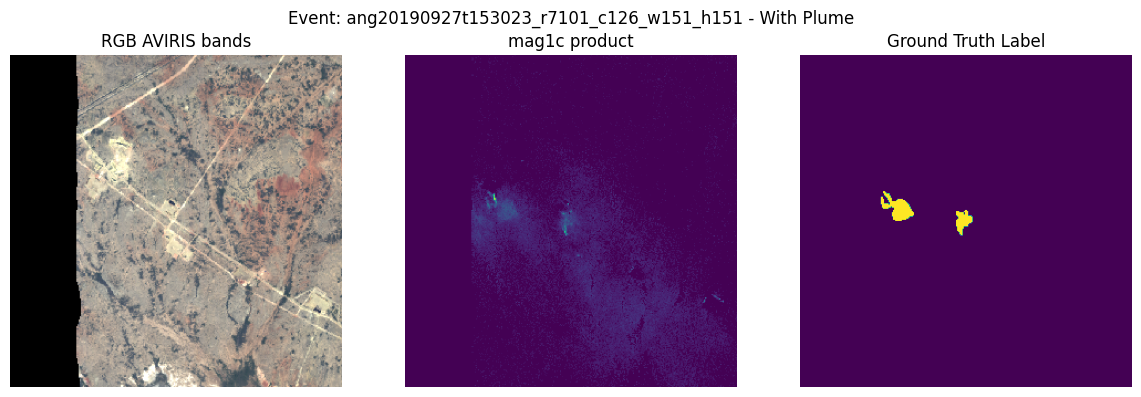

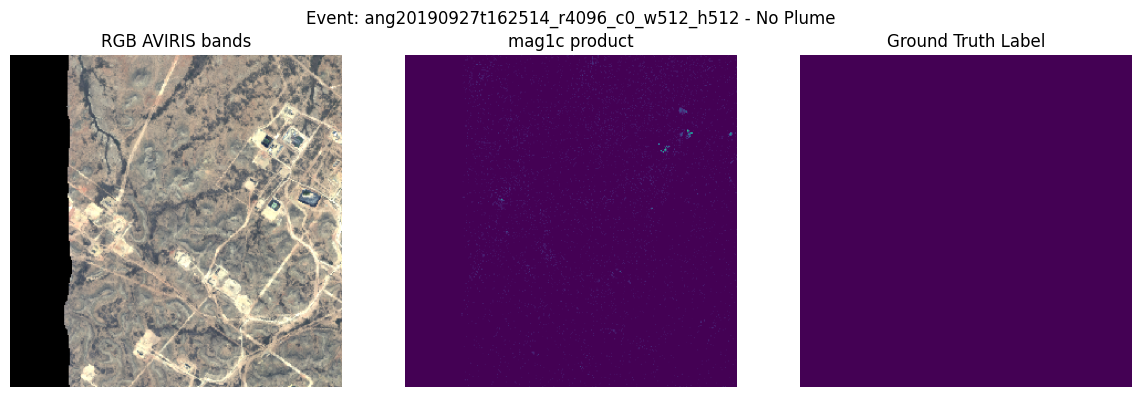

In [ ]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Constants
size_read = 300
fig_size_multiplier = 4
# Show one example each for plume and no-plume
examples_to_show = {'True': None, 'False': None}

# Find one example each for plume and no-plume
for has_plume in [True, False]:
    sample = df[df['has_plume'] == has_plume].sample(n=1)
    examples_to_show[str(has_plume)] = sample['id'].values[0]

# Process each example found
for has_plume, event_id in examples_to_show.items():
    ft = os.path.join(visualise_folder, event_id)
    # File paths for the spectral images and mag1c
    aviris_r = os.path.join(ft, "TOA_AVIRIS_640nm.tif")
    aviris_g = os.path.join(ft, "TOA_AVIRIS_550nm.tif")
    aviris_b = os.path.join(ft, "TOA_AVIRIS_460nm.tif")
    magic_path = os.path.join(ft, "mag1c.tif")
    # Ground truth
    gt_path = os.path.join(ft, "labelbinary.tif")

    with rasterio.open(gt_path) as src:
        width, height = src.width, src.height
        # Compute shape to read to from pyramids and speed up plotting
        shape = src.shape
        out_shape = (size_read, int(round(size_read * shape[1] / shape[0]))) if shape[0] > shape[1] else (int(round(size_read * shape[0] / shape[1])), size_read)
        gt = src.read(1, out_shape=out_shape)

    with rasterio.open(magic_path) as src:
        magic = src.read(1, out_shape=out_shape)
    with rasterio.open(aviris_r) as src:
        r = src.read(1, out_shape=out_shape)
    with rasterio.open(aviris_g) as src:
        g = src.read(1, out_shape=out_shape)
    with rasterio.open(aviris_b) as src:
        b = src.read(1, out_shape=out_shape)

    rgb = np.clip(np.stack([r, g, b], axis=-1) / 60., 0, 2)

    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(3 * fig_size_multiplier, fig_size_multiplier), tight_layout=True)
    titles = ['RGB AVIRIS bands', 'mag1c product', 'Ground Truth Label']
    images = [rgb, magic, gt]
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.suptitle(f"Event: {event_id} - {'With Plume' if has_plume == 'True' else 'No Plume'}")
    plt.show()


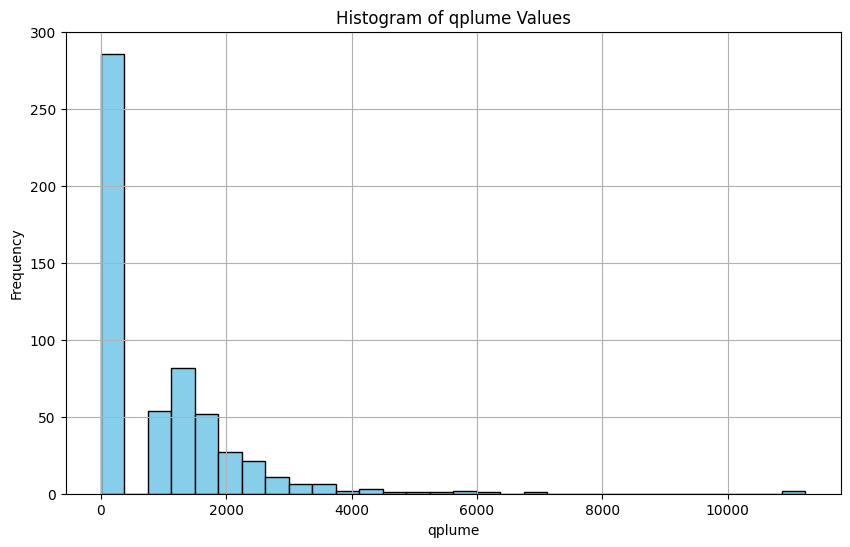

In [ ]:
import matplotlib.pyplot as plt

# Histogram of qplume values
plt.figure(figsize=(10, 6))
plt.hist(df['qplume'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of qplume Values')
plt.xlabel('qplume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import os

# Specify the directory you want to list
directory_path = '/content/datasets/STARCOP_train_easy/ang20190922t192642_r10240_c0_w512_h512'

# List all files and directories in this directory
contents = os.listdir(directory_path)

# Optionally, print each item
for item in contents:
    print(item)


TOA_WV3_SWIR7.tif
TOA_WV3_SWIR6.tif
TOA_AVIRIS_2310nm.tif
TOA_AVIRIS_2004nm.tif
TOA_WV3_SWIR5.tif
TOA_WV3_SWIR1.tif
TOA_AVIRIS_640nm.tif
TOA_AVIRIS_460nm.tif
TOA_WV3_SWIR4.tif
label_rgba.tif
TOA_AVIRIS_2360nm.tif
TOA_WV3_SWIR2.tif
TOA_AVIRIS_2350nm.tif
weight_mag1c.tif
TOA_AVIRIS_550nm.tif
TOA_WV3_SWIR8.tif
TOA_AVIRIS_2109nm.tif
mag1c.tif
TOA_WV3_SWIR3.tif
labelbinary.tif


## (bonus) Plot location of the data

In the following cell we will show the location of these events around the Permian Basin area using the `folium` package.

*Note: This visualisation shows just the loaded subset of data (in this notebook that is either the mini dataset with 10 samples, or the test dataset, or a train_easy subset).*

In [ ]:
import folium
import rasterio.warp

map_bb = folium.Map(location=[31.70239727088906, -103.58010434928194],
                    zoom_start=8,
                    prefer_canvas=True) #tiles="Stamen Toner")

map_icons = []

for event_id in list(df["id"]):
  ft = os.path.join(visualise_folder, event_id)
  gt_path = os.path.join(ft, "labelbinary.tif")
  with rasterio.open(gt_path) as src:
    bounds_utm = src.bounds
    bounds_lng_lat = rasterio.warp.transform_bounds(src.crs, {"init": "epsg:4326"}, *bounds_utm)
    lng_lat_center = src.lnglat()
    lat_lng_center = lng_lat_center[-1::-1]
    bounds_lng_lat = lng_lat_center[0] - 1, lng_lat_center[1] - 1, lng_lat_center[0] + 1, lng_lat_center[1] + 1

  marker = folium.Circle(location=list(lat_lng_center), radius=1, color='blue', fill_color='blue')
  map_bb.add_child(marker)

# note: this will make more sense for the full dataset, mini version contains only few samples
map_bb

In [ ]:
import folium
import rasterio
import rasterio.warp
import os
import pandas as pd
import numpy as np

# Assuming df and visualise_folder are already defined
# Make sure to load your DataFrame with 'id' similar to your dataset structure

# Select a random sample from the DataFrame
random_sample = df.sample(n=1).iloc[0]
event_id = random_sample['id']

# Create a map centered on a general location (you can adjust this later)
map_bb = folium.Map(location=[31.70239727088906, -103.58010434928194], zoom_start=8, prefer_canvas=True)

# Construct the file path for the raster file
ft = os.path.join(visualise_folder, event_id)
gt_path = os.path.join(ft, "labelbinary.tif")

# Open the raster file and extract geographic information
with rasterio.open(gt_path) as src:
    # Transform bounds to latitude and longitude
    bounds_lng_lat = rasterio.warp.transform_bounds(src.crs, {"init": "epsg:4326"}, src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top)
    lng_lat_center = src.lnglat()
    lat_lng_center = lng_lat_center[::-1]  # Reversing to match (latitude, longitude) order

    # Create a marker for the random location
    marker = folium.Circle(
        location=lat_lng_center,
        radius=10,  # Radius can be adjusted for visibility
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Random Location: {event_id}, Center Lat/Lng: {lat_lng_center}"
    )
    map_bb.add_child(marker)

# Display the map
map_bb.save('random_location_map.html')  # Save the map as an HTML file
map_bb  # Display the map within a Jupyter notebook if applicable


In [ ]:

!pip install --quiet rasterio
!pip install --quiet --upgrade gdown

In [ ]:
# Clone the repository:
!git clone https://github.com/spaceml-org/STARCOP.git

Cloning into 'STARCOP'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 154 (delta 48), reused 119 (delta 25), pack-reused 0
Receiving objects: 100% (154/154), 8.56 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [ ]:
%cd /content/STARCOP

/content/STARCOP


In [ ]:

!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.2/529.2 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
# additional libraries and exact versions:
!pip install git+https://github.com/spaceml-org/georeader.git
!pip install torchtext==0.14.1

  Cloning https://github.com/spaceml-org/georeader.git to /tmp/pip-req-build-dm8byt63
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/georeader.git /tmp/pip-req-build-dm8byt63
  Resolved https://github.com/spaceml-org/georeader.git to commit 813d92ebbe79aa79b99c9a4bf05b7894cbc30bf3
  Preparing metadata (setup.py) ... done
  Created wheel for georeader-spaceml: filename=georeader_spaceml-1.1.1-py3-none-any.whl size=149908 sha256=267aace140d9d69144246a47c9ebaba57a5fcf354bddbe4e199f8b9309b95536
  Stored in directory: /tmp/pip-ephem-wheel-cache-_fpp8ato/wheels/d2/8e/86/ec6888325df45badf27fbc6acbb49d9d0432d04ddf3b8020b4
Successfully built georeader-spaceml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import os
import numpy as np
from PIL import Image
import rasterio


In [ ]:
class PlumeDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.plume_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.plume_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.plume_frame.loc[idx, 'id'])
        # Load RGB and mag1c images
        with rasterio.open(os.path.join(img_name, "TOA_AVIRIS_460nm.tif")) as src:
            band_r = src.read(1)
        with rasterio.open(os.path.join(img_name, "TOA_AVIRIS_550nm.tif")) as src:
            band_g = src.read(1)
        with rasterio.open(os.path.join(img_name, "TOA_AVIRIS_640nm.tif")) as src:
            band_b = src.read(1)
        with rasterio.open(os.path.join(img_name, "mag1c.tif")) as src:
            band_mag1c = src.read(1)

        image = np.stack([band_r, band_g, band_b, band_mag1c], axis=-1)
        image = Image.fromarray(image.astype(np.uint8), 'RGBA')  # Create an RGBA image

        label = 1 if self.plume_frame.loc[idx, 'has_plume'] else 0

        if self.transform:
            image = self.transform(image)

        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to fit model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.5], std=[0.229, 0.224, 0.225, 0.25])  # Adjust as needed
])

# Example usage
dataset = PlumeDataset(csv_file='datasets/STARCOP_train_easy/train_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406, 0.5], std=[0.229, 0.224, 0.225, 0.25])  # Adjust as needed
])


In [ ]:
train_dataset = PlumeDataset(csv_file='datasets/STARCOP_train_easy/train_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


In [ ]:
model = models.resnet18(pretrained=True)
model.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Adjust for 4-channel input

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Binary classification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from sklearn.model_selection import train_test_split

# Load your entire dataset
df = pd.read_csv('datasets/STARCOP_train_easy/train_easy.csv')

# Split the dataset into training and validation
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)  # 20% for validation

# Save the validation dataframe to a CSV file
valid_df.to_csv('datasets/STARCOP_train_easy/valid_easy.csv', index=False)

print("Training and validation split completed. Validation data saved to 'valid_easy.csv'.")


Training and validation split completed. Validation data saved to 'valid_easy.csv'.


In [ ]:
# Assuming PlumeDataset has been defined as previously shown
train_dataset = PlumeDataset(csv_file='datasets/STARCOP_train_easy/train_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)
valid_dataset = PlumeDataset(csv_file='datasets/STARCOP_train_easy/valid_easy.csv', root_dir='/content/datasets/STARCOP_train_easy', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)


In [ ]:
# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation loop
for epoch in range(10):  # Adjust the number of epochs
    model.train()
    total_train_loss = 0
    total_train_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item() * inputs.size(0)
        total_train_samples += inputs.size(0)

    avg_train_loss = total_train_loss / total_train_samples

    # Validation phase
    model.eval()
    total_valid_loss = 0
    total_valid_samples = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_valid_loss += loss.item() * inputs.size(0)
            total_valid_samples += inputs.size(0)

    avg_valid_loss = total_valid_loss / total_valid_samples

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_valid_loss:.4f}')


Epoch 1, Training Loss: 0.4132, Validation Loss: 0.3520
Epoch 2, Training Loss: 0.1755, Validation Loss: 0.2582
Epoch 3, Training Loss: 0.1288, Validation Loss: 0.2066
Epoch 4, Training Loss: 0.1030, Validation Loss: 0.0887
Epoch 5, Training Loss: 0.0673, Validation Loss: 0.0247
Epoch 6, Training Loss: 0.0309, Validation Loss: 0.1541
Epoch 7, Training Loss: 0.0181, Validation Loss: 0.0031
Epoch 8, Training Loss: 0.0149, Validation Loss: 0.0087
Epoch 9, Training Loss: 0.0186, Validation Loss: 0.0010
Epoch 10, Training Loss: 0.0265, Validation Loss: 0.2048


In [ ]:
# prompt: save the model the drive

torch.save(model, "/content/drive/MyDrive/model.pt")


In [ ]:
correct = 0
total = 0

for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

train_accuracy = (correct / total) * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')


Training Accuracy: 79.43%


In [ ]:
# Create dataset and data loader for the test set
test_dataset = PlumeDataset(csv_file='datasets/STARCOP_test/test.csv', root_dir='/content/datasets/STARCOP_test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # No need to shuffle test data

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
test_losses = []
test_correct = 0
test_total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        test_loss = criterion(outputs, labels)
        test_losses.append(test_loss.item())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = (test_correct / test_total) * 100
avg_test_loss = sum(test_losses) / len(test_losses)

print(f'Test Accuracy: {test_accuracy:.2f}%')
print(f'Average Test Loss: {avg_test_loss:.4f}')


Test Accuracy: 72.51%
Average Test Loss: 0.5485


In [ ]:
import random

# Choose a random sample from the test dataset
random_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[random_index]

# Prepare the image for prediction (unsqueeze batch dimension)
image = image.unsqueeze(0).to(device)

# Run the image through the model
model.eval()
with torch.no_grad():
    output = model(image)

# Convert the output to class probabilities using softmax
probabilities = torch.softmax(output, dim=1)

# Get the predicted label (class with highest probability)
_, predicted_label = torch.max(output, 1)

# Print the original and predicted outputs
print(f'Original Label: {label}')
print(f'Predicted Label: {predicted_label.item()}')
print(f'Class Probabilities: {probabilities.squeeze().tolist()}')


Original Label: 1
Predicted Label: 1
Class Probabilities: [0.44048070907592773, 0.5595192313194275]


In [ ]:
df_test

,id,candidate_id,qplume,name,folder,date,datetime,window_col_off,window_row_off,window_width,window_height,subset,difficulty,label_path,has_plume,window_labels
176,ang20191018t144405_r2674_c436_w151_h151,ang20191018t144405-3,6957.15116,ang20191018t144405,/AVIRISNG/Permian2019/ang20191018t144405_r2674...,2019-10-18,2019-10-18 14:44:05+00:00,0,0,512,512,test,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
177,ang20191018t163108_r14851_c525_w151_h151,ang20191018t163108-7,6634.18018,ang20191018t163108,/AVIRISNG/Permian2019/ang20191018t163108_r1485...,2019-10-18,2019-10-18 16:31:08+00:00,0,0,512,512,test,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
178,ang20191018t141549_r3900_c244_w151_h151,ang20191018t141549-7,5656.60821,ang20191018t141549,/AVIRISNG/Permian2019/ang20191018t141549_r3900...,2019-10-18,2019-10-18 14:15:49+00:00,0,0,512,512,test,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
179,ang20191025t165545_r6573_c24_w151_h151,ang20191025t165545-4,5637.00737,ang20191025t165545,/AVIRISNG/Permian2019/ang20191025t165545_r6573...,2019-10-25,2019-10-25 16:55:45+00:00,0,0,512,512,test,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
180,ang20191018t190719_r2696_c420_w151_h151,ang20191018t190719-6,5525.95692,ang20191018t190719,/AVIRISNG/Permian2019/ang20191018t190719_r2696...,2019-10-18,2019-10-18 19:07:19+00:00,0,0,512,512,test,easy,gs://starcop/Permian/permian_2019_official/ang...,True,"Window(col_off=-180, row_off=-180, width=512, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,ang20191025t165545_r3328_c0_w512_h512,NaN,0.00000,ang20191025t165545,/AVIRISNG/Permian2019/ang20191025t165545_r3328...,2019-10-25,2019-10-25 16:55:45+00:00,0,0,512,512,test,random,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
132,ang20191025t171141_r9216_c0_w512_h512,NaN,0.00000,ang20191025t171141,/AVIRISNG/Permian2019/ang20191025t171141_r9216...,2019-10-25,2019-10-25 17:11:41+00:00,0,0,512,512,test,hard,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
133,ang20191025t171141_r9728_c0_w512_h512,NaN,0.00000,ang20191025t171141,/AVIRISNG/Permian2019/ang20191025t171141_r9728...,2019-10-25,2019-10-25 17:11:41+00:00,0,0,512,512,test,hard,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."
118,ang20191021t194835_r5120_c0_w512_h512,NaN,0.00000,ang20191021t194835,/AVIRISNG/Permian2019/ang20191021t194835_r5120...,2019-10-21,2019-10-21 19:48:35+00:00,0,0,512,512,test,random,NaN,False,"Window(col_off=0, row_off=0, width=512, height..."


In [ ]:
def get_predictions(model, loader):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
    return predictions, actuals


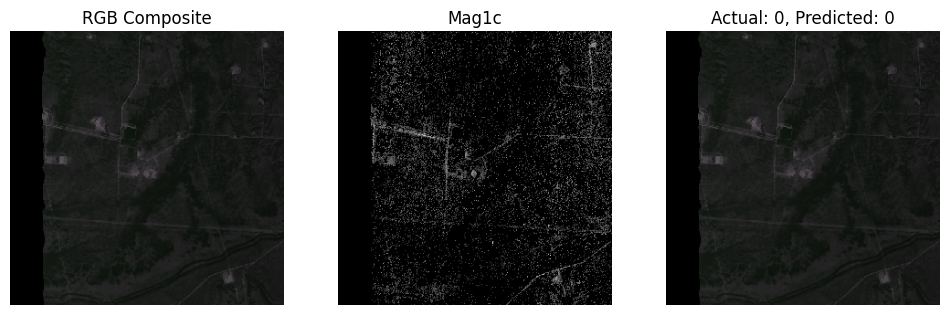

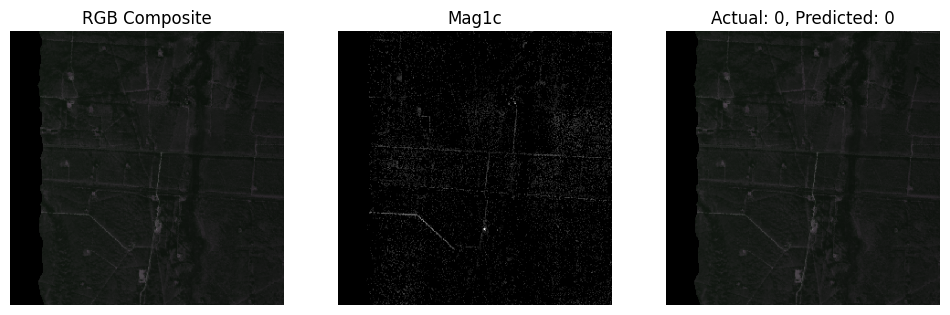

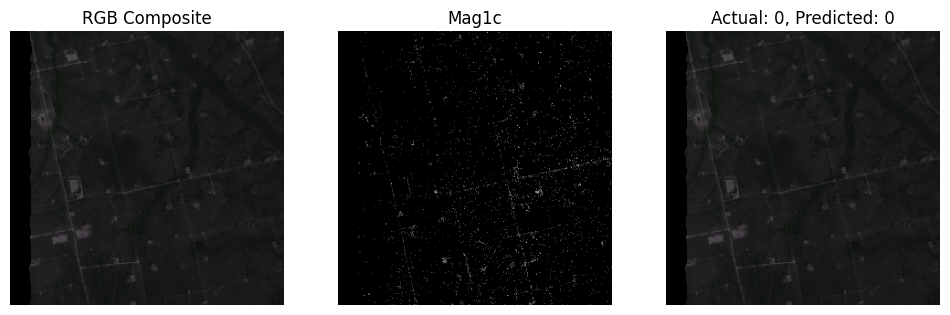

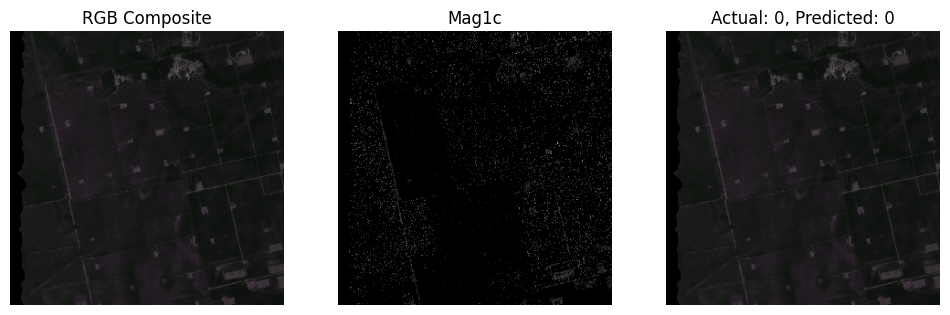

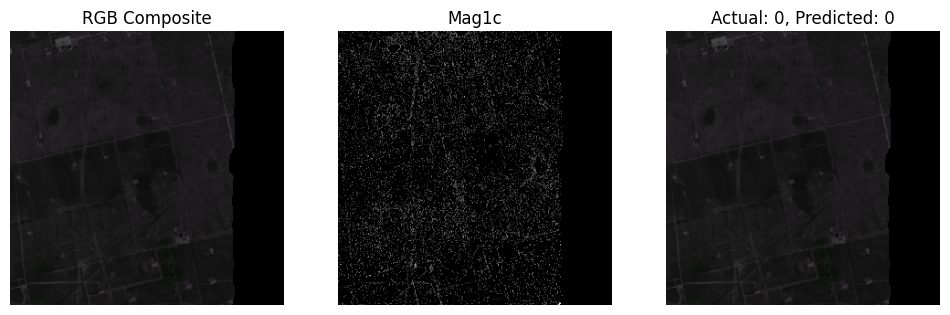

In [ ]:
import matplotlib.pyplot as plt
import rasterio

# Get predictions
predictions, actuals = get_predictions(model, test_loader)

# Visualization parameters
size_read = 300
fig_size_multiplier = 4
show_first = 5  # Show 5 samples

# Visualize the specified number of test samples
for idx in range(show_first):
    event_id = df_test.loc[idx, 'id']
    ft = os.path.join('/content/datasets/STARCOP_test', event_id)

    # Load images
    with rasterio.open(os.path.join(ft, "TOA_AVIRIS_640nm.tif")) as src:
        r = src.read(1, out_shape=(size_read, size_read))
    with rasterio.open(os.path.join(ft, "TOA_AVIRIS_550nm.tif")) as src:
        g = src.read(1, out_shape=(size_read, size_read))
    with rasterio.open(os.path.join(ft, "TOA_AVIRIS_640nm.tif")) as src:
        b = src.read(1, out_shape=(size_read, size_read))
    with rasterio.open(os.path.join(ft, "mag1c.tif")) as src:
        mag1c = src.read(1, out_shape=(size_read, size_read))

    rgb = np.dstack((r, g, b))

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(3 * fig_size_multiplier, fig_size_multiplier))
    axes[0].imshow(rgb / 255)  # Normalize RGB for display
    axes[0].set_title("RGB Composite")
    axes[0].axis('off')

    axes[1].imshow(mag1c, cmap='gray')
    axes[1].set_title("Mag1c")
    axes[1].axis('off')

    axes[2].imshow(rgb / 255)  # Just reusing RGB for placeholder
    axes[2].set_title(f"Actual: {actuals[idx]}, Predicted: {predictions[idx]}")
    axes[2].axis('off')

    plt.show()
